In [66]:
import pandas as pd
import numpy as np
import os

# visualize
import seaborn as sns
import matplotlib.pyplot as plt

# turn off pink warning boxes
import warnings
warnings.filterwarnings("ignore")

# acquire
from pydataset import data
# for preparation state
from sklearn.model_selection import train_test_split

In [67]:
# *************************************  connection url **********************************************

# Create helper function to get the necessary connection url.
def get_connection(db_name):
    '''
    This function uses my info from my env file to
    create a connection url to access the Codeup db.
    '''
    from env import host, username, password
    return f'mysql+pymysql://{username}:{password}@{host}/{db_name}'


In [68]:
# acquire data

In [69]:
#acquire data for the first time
def get_new_telco_churn():
    '''
    This function reads in the telco_churn data from the Codeup db
    and returns a pandas DataFrame with all columns and joined with other tables.
    '''
    sql_query = '''
    SELECT * FROM customers
    JOIN contract_types USING (contract_type_id)
    JOIN internet_service_types USING (internet_service_type_id)
    JOIN payment_types USING (payment_type_id)
    '''
    return pd.read_sql(sql_query, get_connection('telco_churn'))


In [70]:
#acquire data 
def get_telco_churn():
    '''
    This function reads in telco_churn data from Codeup database, writes data to
    a csv file if a local file does not exist, and returns a df.
    '''
    if os.path.isfile('telco_churn.csv'):
        
        # If csv file exists, read in data from csv file.
        df = pd.read_csv('telco_churn.csv', index_col=0)
        
    else:
        
        # Read fresh data from db into a DataFrame.
        df = get_new_telco_churn()
        
        # Write DataFrame to a csv file.
        df.to_csv('telco_churn.csv')
        
    return df

In [71]:
#acquire data with my function
df= get_telco_churn()

In [72]:
# check the information before preparation process
df.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,3,0016-QLJIS,Female,0,Yes,Yes,65,Yes,...,Yes,Yes,Yes,Yes,90.45,5957.9,No,Two year,DSL,Mailed check
1,4,1,3,0017-DINOC,Male,0,No,No,54,No,...,Yes,Yes,No,No,45.20,2460.55,No,Two year,DSL,Credit card (automatic)
2,3,1,3,0019-GFNTW,Female,0,No,No,56,No,...,Yes,No,No,No,45.05,2560.1,No,Two year,DSL,Bank transfer (automatic)
3,4,1,3,0056-EPFBG,Male,0,Yes,Yes,20,No,...,Yes,No,No,Yes,39.40,825.4,No,Two year,DSL,Credit card (automatic)
4,3,1,3,0078-XZMHT,Male,0,Yes,No,72,Yes,...,Yes,Yes,Yes,Yes,85.15,6316.2,No,Two year,DSL,Bank transfer (automatic)


In [73]:
df.shape

(7043, 24)

# preparation 

In [74]:
#check the type of the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

In [75]:
#checking the type of  the columns. I notice total_charges is an object type


In [76]:
#we cannot conver total_charges to float because there are ' '
#df['total_charges'].astype('float')

In [77]:
#take a look at the rows with space
df['total_charges'][df['total_charges']== ' ']

85       
156      
236      
255      
339      
5681     
5717     
5727     
5798     
6007     
6257     
Name: total_charges, dtype: object

In [78]:
#we will replace space with '0' for only these columns
df['total_charges'][df['total_charges']== ' ']= df['total_charges'][df['total_charges']== ' '].replace(' ', '0')

In [79]:
#checking if we replace it
df['total_charges'][df['total_charges']== ' ']

Series([], Name: total_charges, dtype: object)

In [80]:
#in order to conver total_charges to float, I need will add '0' to ' '
#df['total_charges'] = df['total_charges'] + '0'

In [81]:
#convert to a float type
df['total_charges'] = df['total_charges'].astype('float')
df['total_charges'].dtype

dtype('float64')

In [82]:
#checking nulls
df.isnull().sum()

df.isna().sum()

payment_type_id             0
internet_service_type_id    0
contract_type_id            0
customer_id                 0
gender                      0
senior_citizen              0
partner                     0
dependents                  0
tenure                      0
phone_service               0
multiple_lines              0
online_security             0
online_backup               0
device_protection           0
tech_support                0
streaming_tv                0
streaming_movies            0
paperless_billing           0
monthly_charges             0
total_charges               0
churn                       0
contract_type               0
internet_service_type       0
payment_type                0
dtype: int64

In [ ]:
#checking for duplicates
df.duplicated().sum()

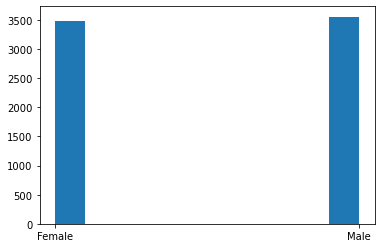

In [84]:
# individual variable distributions are plotted
plt.hist(df['gender'])
plt.show()

In [96]:
# plot each column, exclude the first 4 columns
cols =df.columns.to_list()
cols

['payment_type_id',
 'internet_service_type_id',
 'contract_type_id',
 'customer_id',
 'gender',
 'senior_citizen',
 'partner',
 'dependents',
 'tenure',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'monthly_charges',
 'total_charges',
 'churn',
 'contract_type',
 'internet_service_type',
 'payment_type']

In [97]:
# plot each column, exclude the first 4 columns
cols[4:]

['gender',
 'senior_citizen',
 'partner',
 'dependents',
 'tenure',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'monthly_charges',
 'total_charges',
 'churn',
 'contract_type',
 'internet_service_type',
 'payment_type']

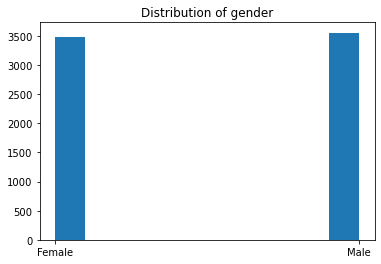

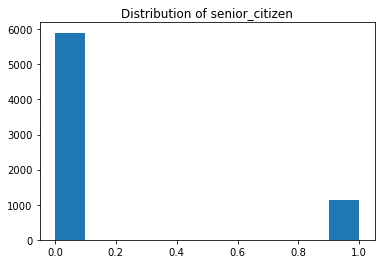

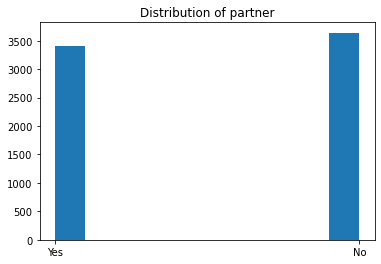

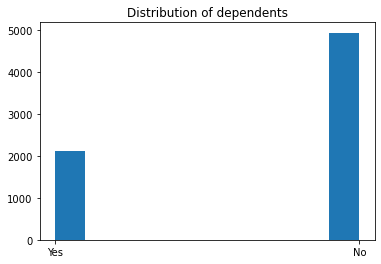

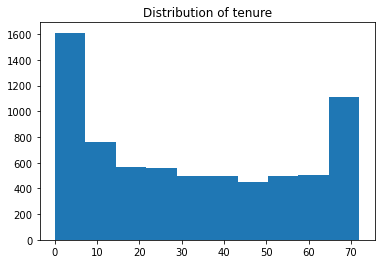

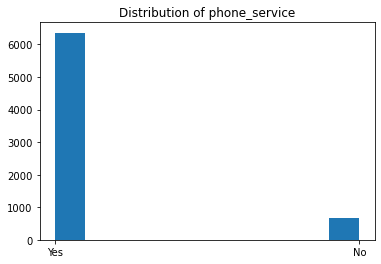

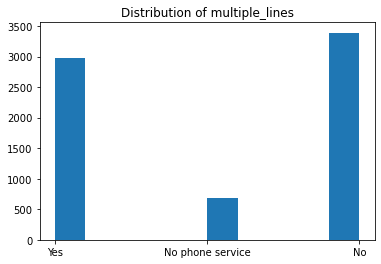

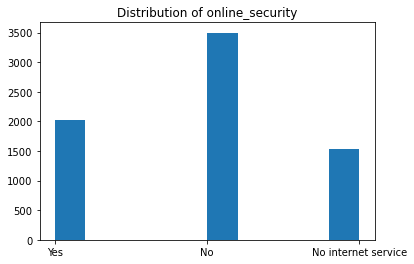

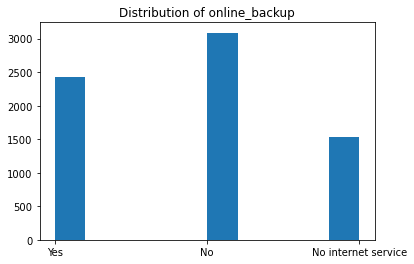

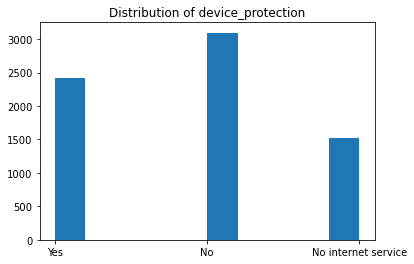

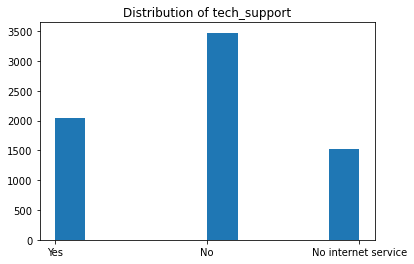

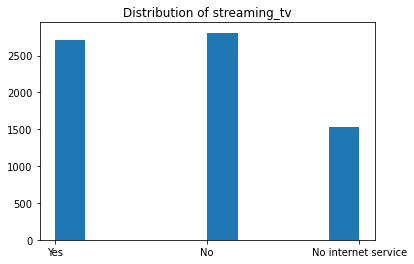

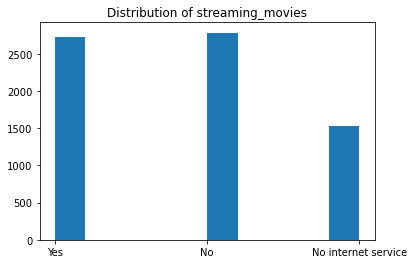

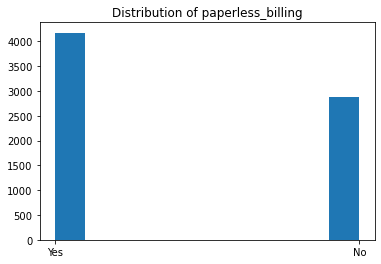

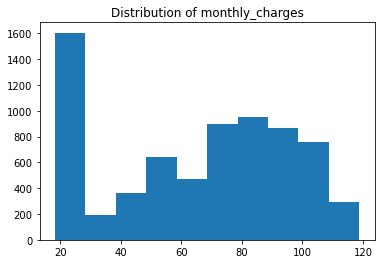

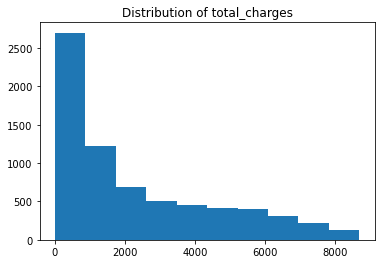

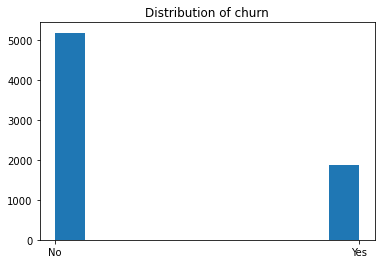

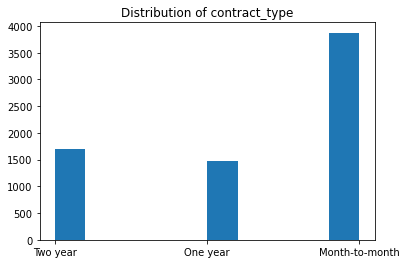

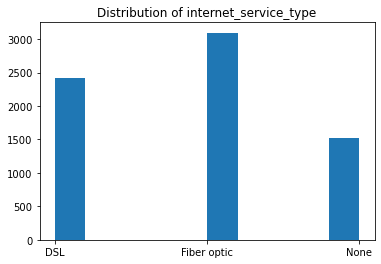

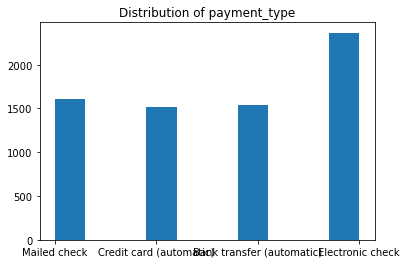

In [99]:
for col in cols[4:]:
    plt.hist(df[col])
    plt.title(f'Distribution of {col}')
    plt.show()

In [150]:
#make a function
def distribution (df):
    cols =df.columns.to_list()
    for col in cols[4:]:
        plt.hist(df[col])
        plt.title(f'Distribution of {col}')
        plt.show()

In [ ]:
#checking again
df.info()

In [ ]:
#check the columns yes?no columns
df.head(1)

In [ ]:
#all the columns that have yes/no
col_list = ['partner', 'dependents','phone_service', 'paperless_billing','churn' ]

In [ ]:
#check all the values for these columns
for col in col_list:
    print(col)
    print(df[col].value_counts())
    print('__________________________')

In [ ]:
#checking if we can change no/yes to 0/1 and compare above
(df.churn == 'Yes').astype(int).value_counts()

In [ ]:
#using this code we can change it
(df[col_list] == 'Yes').astype(int)

In [ ]:
# changgin the value no/yes to 0/1
df[col_list] = (df[col_list] == 'Yes').astype(int)

In [ ]:
df[col_list].head()

In [ ]:
#check all the values for these columns to make sure it is correct
for col in col_list:
    print(col)
    print(df[col].value_counts(dropna = False))
    print('__________________________')

In [ ]:
df.info()

In [ ]:
#selecting all the columns that are object type
df.select_dtypes('object').columns

In [ ]:
#make a list of these type of columns , excluding 'customer_id'
list(df.select_dtypes('object').columns)[1:]

In [ ]:
#checking the value of each columns
col_list = list(df.select_dtypes('object').columns)[1:]
for col in col_list:
    print(col)
    print(df[col].value_counts())
    print('__________________________')

In [ ]:
#the columns 'online_security','online_backup','device_protection','tech_support','streaming_tv','streaming_movies'
#have the same values 
col_list[2:8]

In [ ]:
#create a dicttionary that have the values that we are going to change
var= {
    'No':0,
    'Yes':1,
    'No internet service':3
}

In [ ]:
#using .map and for loop to change the values of each column on the list

In [ ]:
for col in col_list[2:8]:
      df[col]= df[col].map(var) 


In [ ]:
#check the changes
df[col_list[2:8]].head()

In [ ]:
#checking again the list of columns as 'object type'
df.select_dtypes('object').columns

In [ ]:
#I decide to convert this column to a values
df['multiple_lines'].unique()

In [ ]:
#replace the values for numeric
df.replace({'multiple_lines': {'No':1, 'Yes':2, 'No phone service': 0}}, inplace=True)


In [ ]:
df['multiple_lines'].unique()

In [ ]:
# make a list of the columns that are object type , exclude "customer_id"
col_list = list(df.select_dtypes('object').columns)[1:]

In [ ]:
col_list

In [ ]:
#create a dummy df of each column on the list
for col in col_list:
    dummy_df = pd.get_dummies(df[col], drop_first=True)
    df = pd.concat([df, dummy_df], axis=1)

In [ ]:
# drop the columns that we already use to create dummy_df
df.drop(columns=col_list, inplace=True)

In [ ]:
df.info()

In [ ]:
#there is a column named None, that means no internet service. 
#0 = false (no internet service)
#1 = true (no internet service)

df['None'].value_counts()

In [ ]:
# I will rename the column as has_internet
df.rename(columns={'None':'has_internet'}, inplace= True )

In [ ]:
#checking the change
df['has_internet'].value_counts()

In [ ]:
#to match the values we want 
#0  = false (has internet)
#1 = true (has_internet)
df['has_internet'] = df['has_internet'].replace({0: 1, 1: 0})

In [ ]:
df['has_internet'].value_counts()

In [20]:
#creating my function

def clean_data(df):
    '''
    This function will drop payment_type_id', 'internet_service_type_id','contract_type_id', 
    convert all the columns that have yes/no to 0/1, 
    create dummy vars from 'gender', 'contract_type', 'internet_service_type', 'payment_type',
    change total_charges to a float type. 
    '''

    #clean data
    # conver total_charges to float
    df['total_charges'][df['total_charges']== ' ']= df['total_charges'][df['total_charges']== ' '].replace(' ', '0')
    df['total_charges'] = df['total_charges'].astype('float')
    
    #convert all the columns that have yes/no to 0/1
    col_list = ['partner', 'dependents','phone_service', 'paperless_billing','churn' ]
    df[col_list] = (df[col_list] == 'Yes').astype(int)
    
    #change columns to 0,1,2
    #getting a list of the  columns that I want to change
    col_list = list(df.select_dtypes('object').columns)[1:]
    #create a dicttionary to change the value
    var= {
        'No':0,
        'Yes':1,
        'No internet service':3
    }
    #use a for loop to change every column
    for col in col_list[2:8]:
      df[col]= df[col].map(var) 
    
    #replace the values of multiple_lines
    df.replace({'multiple_lines': {'No':1, 'Yes':2, 'No phone service': 0}}, inplace=True)
    
    #create a dummy df
    col_list = list(df.select_dtypes('object').columns)[1:]
    #create a dummy df
    for col in col_list:
        dummy_df = pd.get_dummies(df[col])
         ## Concatenate the dummy_df dataframe above with the original df
        df = pd.concat([df, dummy_df], axis=1)
    # drop the columns that we already use to create dummy_df
    df.drop(columns=col_list, inplace=True)
    
    #drop duplicates columns
    df.drop(columns = ['payment_type_id', 'internet_service_type_id','contract_type_id'], inplace=True)
    
    #  rename the column as has_internet
    df.rename(columns={'None':'has_internet'}, inplace= True )
    #changing the values to undestand better the meaning
    df['has_internet'] = df['has_internet'].replace({0: 1, 1: 0})
    # columns name change (remove space and -)
    df.columns = [col.lower().replace(' ', '_').replace('-','_') for col in df]
    df.columns
    return df


In [45]:
#acquire data
df = get_telco_churn()

In [46]:
df.shape

(7043, 24)

In [47]:
df.columns

Index(['payment_type_id', 'internet_service_type_id', 'contract_type_id',
       'customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'paperless_billing', 'monthly_charges',
       'total_charges', 'churn', 'contract_type', 'internet_service_type',
       'payment_type'],
      dtype='object')

In [48]:
#use my clean function
df_clean = clean_data(df)

In [53]:
df_clean.shape

(7043, 29)

In [50]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer_id                7043 non-null   object 
 1   senior_citizen             7043 non-null   int64  
 2   partner                    7043 non-null   int64  
 3   dependents                 7043 non-null   int64  
 4   tenure                     7043 non-null   int64  
 5   phone_service              7043 non-null   int64  
 6   multiple_lines             7043 non-null   int64  
 7   online_security            7043 non-null   int64  
 8   online_backup              7043 non-null   int64  
 9   device_protection          7043 non-null   int64  
 10  tech_support               7043 non-null   int64  
 11  streaming_tv               7043 non-null   int64  
 12  streaming_movies           7043 non-null   int64  
 13  paperless_billing          7043 non-null   int64

In [51]:
#calculate corr
df_corr = df_clean.corr()

In [29]:
df_corr

,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,...,month_to_month,one_year,two_year,dsl,fiber_optic,has_internet,bank_transfer_(automatic),credit_card_(automatic),electronic_check,mailed_check
senior_citizen,1.000000,0.016479,-0.211185,0.016567,0.008576,0.113791,-0.208709,-0.170002,-0.172926,-0.217566,...,0.138360,-0.046262,-0.117000,-0.108322,0.255338,0.182742,-0.016159,-0.024135,0.171718,-0.153477
partner,0.016479,1.000000,0.452676,0.379697,0.017706,0.117307,0.056157,0.059540,0.064584,0.047420,...,-0.280865,0.082783,0.248091,-0.000851,0.000304,-0.000615,0.110706,0.082029,-0.083852,-0.095125
dependents,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.019657,0.179614,0.161106,0.157003,0.173036,...,-0.231720,0.068368,0.204613,0.052010,-0.165818,-0.139812,0.052021,0.060267,-0.150642,0.059071
tenure,0.016567,0.379697,0.159712,1.000000,0.008448,0.258958,0.085500,0.107643,0.107656,0.084902,...,-0.645561,0.202570,0.558533,0.013274,0.019720,0.039062,0.243510,0.233006,-0.208363,-0.233852
phone_service,0.008576,0.017706,-0.001762,0.008448,1.000000,0.675070,0.146522,0.164540,0.156631,0.145215,...,-0.000742,-0.002791,0.003519,-0.452425,0.289999,-0.172209,0.007556,-0.007721,0.003062,-0.003319
multiple_lines,0.113791,0.117307,-0.019657,0.258958,0.675070,1.000000,-0.074857,-0.034674,-0.038667,-0.074777,...,-0.068119,-0.004199,0.083266,-0.361806,0.414749,0.082560,0.061513,0.042590,0.065663,-0.176117
online_security,-0.208709,0.056157,0.179614,0.085500,0.146522,-0.074857,1.000000,0.884432,0.883200,0.902492,...,-0.327446,0.079135,0.305769,-0.278888,-0.505673,-0.930746,0.034667,0.045975,-0.345600,0.309323
online_backup,-0.170002,0.059540,0.161106,0.107643,0.164540,-0.034674,0.884432,1.000000,0.879558,0.885567,...,-0.304844,0.075950,0.282497,-0.346101,-0.434998,-0.923087,0.033914,0.038887,-0.308409,0.275201
device_protection,-0.172926,0.064584,0.157003,0.107656,0.156631,-0.038667,0.883200,0.879558,1.000000,0.892017,...,-0.330240,0.083700,0.304677,-0.350834,-0.430560,-0.923197,0.032260,0.047479,-0.309516,0.269657
tech_support,-0.217566,0.047420,0.173036,0.084902,0.145215,-0.074777,0.902492,0.885567,0.892017,1.000000,...,-0.343202,0.077659,0.325508,-0.281927,-0.502320,-0.930210,0.037218,0.046797,-0.347130,0.307727


In [ ]:
df_corr.shape

In [30]:
# I just wat to see churn
df_corr['churn']

senior_citizen               0.150889
partner                     -0.150448
dependents                  -0.164221
tenure                      -0.352229
phone_service                0.011942
multiple_lines               0.036310
online_security             -0.307989
online_backup               -0.280770
device_protection           -0.273951
tech_support                -0.306032
streaming_tv                -0.223123
streaming_movies            -0.224214
paperless_billing            0.191825
monthly_charges              0.193356
total_charges               -0.198324
churn                        1.000000
female                       0.008612
male                        -0.008612
month_to_month               0.405103
one_year                    -0.177820
two_year                    -0.302253
dsl                         -0.124214
fiber_optic                  0.308020
has_internet                 0.227890
bank_transfer_(automatic)   -0.117937
credit_card_(automatic)     -0.134302
electronic_c

In [31]:
df_corr['churn'].sort_values(ascending=False)

churn                        1.000000
month_to_month               0.405103
fiber_optic                  0.308020
electronic_check             0.301919
has_internet                 0.227890
monthly_charges              0.193356
paperless_billing            0.191825
senior_citizen               0.150889
multiple_lines               0.036310
phone_service                0.011942
female                       0.008612
male                        -0.008612
mailed_check                -0.091683
bank_transfer_(automatic)   -0.117937
dsl                         -0.124214
credit_card_(automatic)     -0.134302
partner                     -0.150448
dependents                  -0.164221
one_year                    -0.177820
total_charges               -0.198324
streaming_tv                -0.223123
streaming_movies            -0.224214
device_protection           -0.273951
online_backup               -0.280770
two_year                    -0.302253
tech_support                -0.306032
online_secur

In [55]:
df_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
senior_citizen,7043.0,0.162147,0.368612,0.00,0.00,0.00,0.00,1.00
partner,7043.0,0.483033,0.499748,0.00,0.00,0.00,1.00,1.00
dependents,7043.0,0.299588,0.458110,0.00,0.00,0.00,1.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.00,55.00,72.00
phone_service,7043.0,0.903166,0.295752,0.00,1.00,1.00,1.00,1.00
multiple_lines,7043.0,1.325004,0.642730,0.00,1.00,1.00,2.00,2.00
online_security,7043.0,0.936675,1.165986,0.00,0.00,1.00,1.00,3.00
online_backup,7043.0,0.994889,1.142491,0.00,0.00,1.00,1.00,3.00
device_protection,7043.0,0.993895,1.142921,0.00,0.00,1.00,1.00,3.00
tech_support,7043.0,0.940224,1.164650,0.00,0.00,1.00,1.00,3.00


In [57]:
df_clean['female'].sum()

3488

In [58]:
df_clean['male'].sum()

3555

In [59]:
df_clean['senior_citizen'].sum()

1142

In [62]:
df_clean.columns

Index(['customer_id', 'senior_citizen', 'partner', 'dependents', 'tenure',
       'phone_service', 'multiple_lines', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'paperless_billing', 'monthly_charges', 'total_charges', 'churn',
       'female', 'male', 'month_to_month', 'one_year', 'two_year', 'dsl',
       'fiber_optic', 'has_internet', 'bank_transfer_(automatic)',
       'credit_card_(automatic)', 'electronic_check', 'mailed_check'],
      dtype='object')

In [ ]:
df_clean

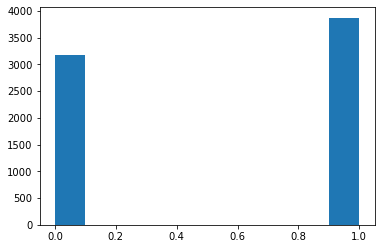

## Split

In [35]:
def split_data(df):
    '''
    take in a DataFrame and return train, validate, and test DataFrames; stratify on survived.
    return train, validate, test DataFrames.
    '''
    train_validate, test = train_test_split(df, test_size=.2, random_state=123, stratify=df.churn)
    train, validate = train_test_split(train_validate, 
                                       test_size=.3, 
                                       random_state=123, 
                                       stratify=train_validate.churn)
    return train, validate, test

In [105]:
train, validate, test = split_data(df_clean)

In [106]:
df_clean.shape

(7043, 29)

In [107]:
train.shape, validate.shape, test.shape

((3943, 29), (1691, 29), (1409, 29))

# Explore

In [108]:
#calculate corr
train_corr = train.corr()

In [109]:
train_corr

,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,...,month_to_month,one_year,two_year,dsl,fiber_optic,has_internet,bank_transfer_(automatic),credit_card_(automatic),electronic_check,mailed_check
senior_citizen,1.000000,0.021704,-0.201859,0.007666,0.017884,0.113170,-0.223637,-0.180790,-0.184644,-0.233621,...,0.157663,-0.051119,-0.134109,-0.120798,0.273674,0.191692,-0.015985,-0.012184,0.173069,-0.167323
partner,0.021704,1.000000,0.463617,0.366470,0.041129,0.138106,0.062610,0.063210,0.065330,0.045711,...,-0.268490,0.070877,0.243511,-0.010031,0.005104,-0.005469,0.094710,0.084683,-0.078225,-0.089288
dependents,-0.201859,0.463617,1.000000,0.160178,0.000945,-0.009975,0.190725,0.170296,0.163513,0.182896,...,-0.236495,0.062744,0.214199,0.049894,-0.167655,-0.145469,0.065442,0.056857,-0.163981,0.063927
tenure,0.007666,0.366470,0.160178,1.000000,0.006187,0.251475,0.072982,0.096895,0.091084,0.074255,...,-0.637509,0.198606,0.549839,0.020264,0.023973,0.052663,0.229637,0.241171,-0.215684,-0.222408
phone_service,0.017884,0.041129,0.000945,0.006187,1.000000,0.680810,0.144817,0.172211,0.157886,0.145593,...,0.004231,-0.005385,0.000155,-0.457254,0.295699,-0.172852,-0.002827,-0.006338,0.020748,-0.014355
multiple_lines,0.113170,0.138106,-0.009975,0.251475,0.680810,1.000000,-0.077098,-0.029548,-0.039713,-0.074705,...,-0.063852,-0.001498,0.075081,-0.375747,0.429184,0.083952,0.063351,0.039014,0.070523,-0.180946
online_security,-0.223637,0.062610,0.190725,0.072982,0.144817,-0.077098,1.000000,0.880648,0.880960,0.899994,...,-0.333326,0.099498,0.291552,-0.272998,-0.503865,-0.929045,0.035474,0.040707,-0.337960,0.305863
online_backup,-0.180790,0.063210,0.170296,0.096895,0.172211,-0.029548,0.880648,1.000000,0.876569,0.880710,...,-0.305250,0.092452,0.265745,-0.342592,-0.430394,-0.920802,0.035530,0.034741,-0.295689,0.263997
device_protection,-0.184644,0.065330,0.163513,0.091084,0.157886,-0.039713,0.880960,0.876569,1.000000,0.889550,...,-0.330609,0.098942,0.288936,-0.344440,-0.428472,-0.920618,0.036868,0.038843,-0.302230,0.266008
tech_support,-0.233621,0.045711,0.182896,0.074255,0.145593,-0.074705,0.899994,0.880710,0.889550,1.000000,...,-0.351141,0.101329,0.310396,-0.277070,-0.498879,-0.927728,0.042540,0.031986,-0.336475,0.305737


In [155]:
# I just wat to see churn
train_corr['churn']

senior_citizen               0.165482
partner                     -0.137696
dependents                  -0.160315
tenure                      -0.352282
phone_service                0.011995
multiple_lines               0.037585
online_security             -0.307907
online_backup               -0.275924
device_protection           -0.269440
tech_support                -0.307941
streaming_tv                -0.214859
streaming_movies            -0.219114
paperless_billing            0.187409
monthly_charges              0.189040
total_charges               -0.201972
churn                        1.000000
female                      -0.006885
male                         0.006885
month_to_month               0.409166
one_year                    -0.185215
two_year                    -0.298877
dsl                         -0.124500
fiber_optic                  0.303591
has_internet                 0.223698
bank_transfer_(automatic)   -0.116189
credit_card_(automatic)     -0.127042
electronic_c

In [156]:
#sort values
cols= train_corr['churn'].sort_values(ascending=False)
cols

churn                        1.000000
month_to_month               0.409166
fiber_optic                  0.303591
electronic_check             0.298034
has_internet                 0.223698
monthly_charges              0.189040
paperless_billing            0.187409
senior_citizen               0.165482
multiple_lines               0.037585
phone_service                0.011995
male                         0.006885
female                      -0.006885
mailed_check                -0.095605
bank_transfer_(automatic)   -0.116189
dsl                         -0.124500
credit_card_(automatic)     -0.127042
partner                     -0.137696
dependents                  -0.160315
one_year                    -0.185215
total_charges               -0.201972
streaming_tv                -0.214859
streaming_movies            -0.219114
device_protection           -0.269440
online_backup               -0.275924
two_year                    -0.298877
online_security             -0.307907
tech_support

In [157]:
# I will select the columns to do the heat map
list(cols[cols < (-.2)].index)


['total_charges',
 'streaming_tv',
 'streaming_movies',
 'device_protection',
 'online_backup',
 'two_year',
 'online_security',
 'tech_support',
 'tenure']

In [158]:
list(cols[cols > .18].index)

['churn',
 'month_to_month',
 'fiber_optic',
 'electronic_check',
 'has_internet',
 'monthly_charges',
 'paperless_billing']

In [159]:
col_list = list(cols[cols > .18].index)  + list(cols[cols < (-.2)].index)

In [160]:
list(cols[cols < (-.2)].index)

['total_charges',
 'streaming_tv',
 'streaming_movies',
 'device_protection',
 'online_backup',
 'two_year',
 'online_security',
 'tech_support',
 'tenure']

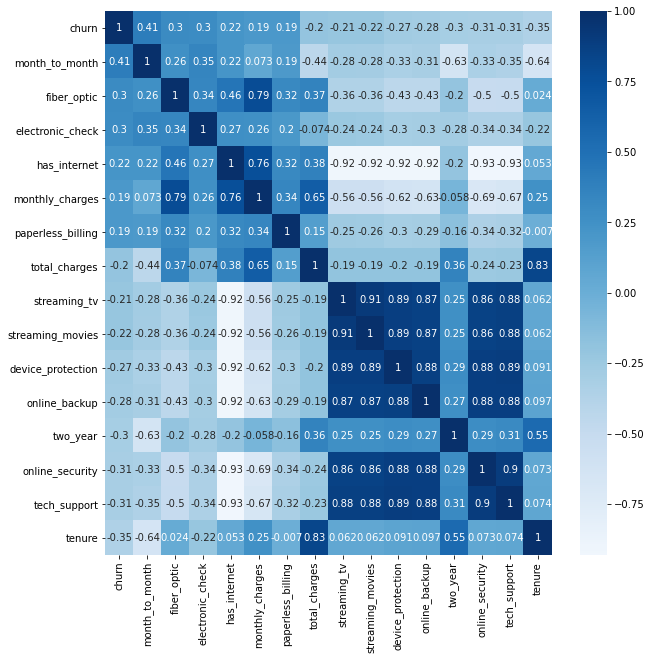

In [144]:
#
plt.figure(figsize=(10,10))
sns.heatmap(train[col_list].corr() , cmap='Blues', center=0, annot=True)

plt.title('')
plt.show()

## Takeaways
churn has positive correlation:
- month_to_month contracts
- internet type : fiber_optic
- payment type: electronic check

churn has negative  correlation:
- tenure
- tech_suport
- online_security


In [161]:
col_list = list(cols[cols > .20].index)  + list(cols[cols < (-.27)].index)

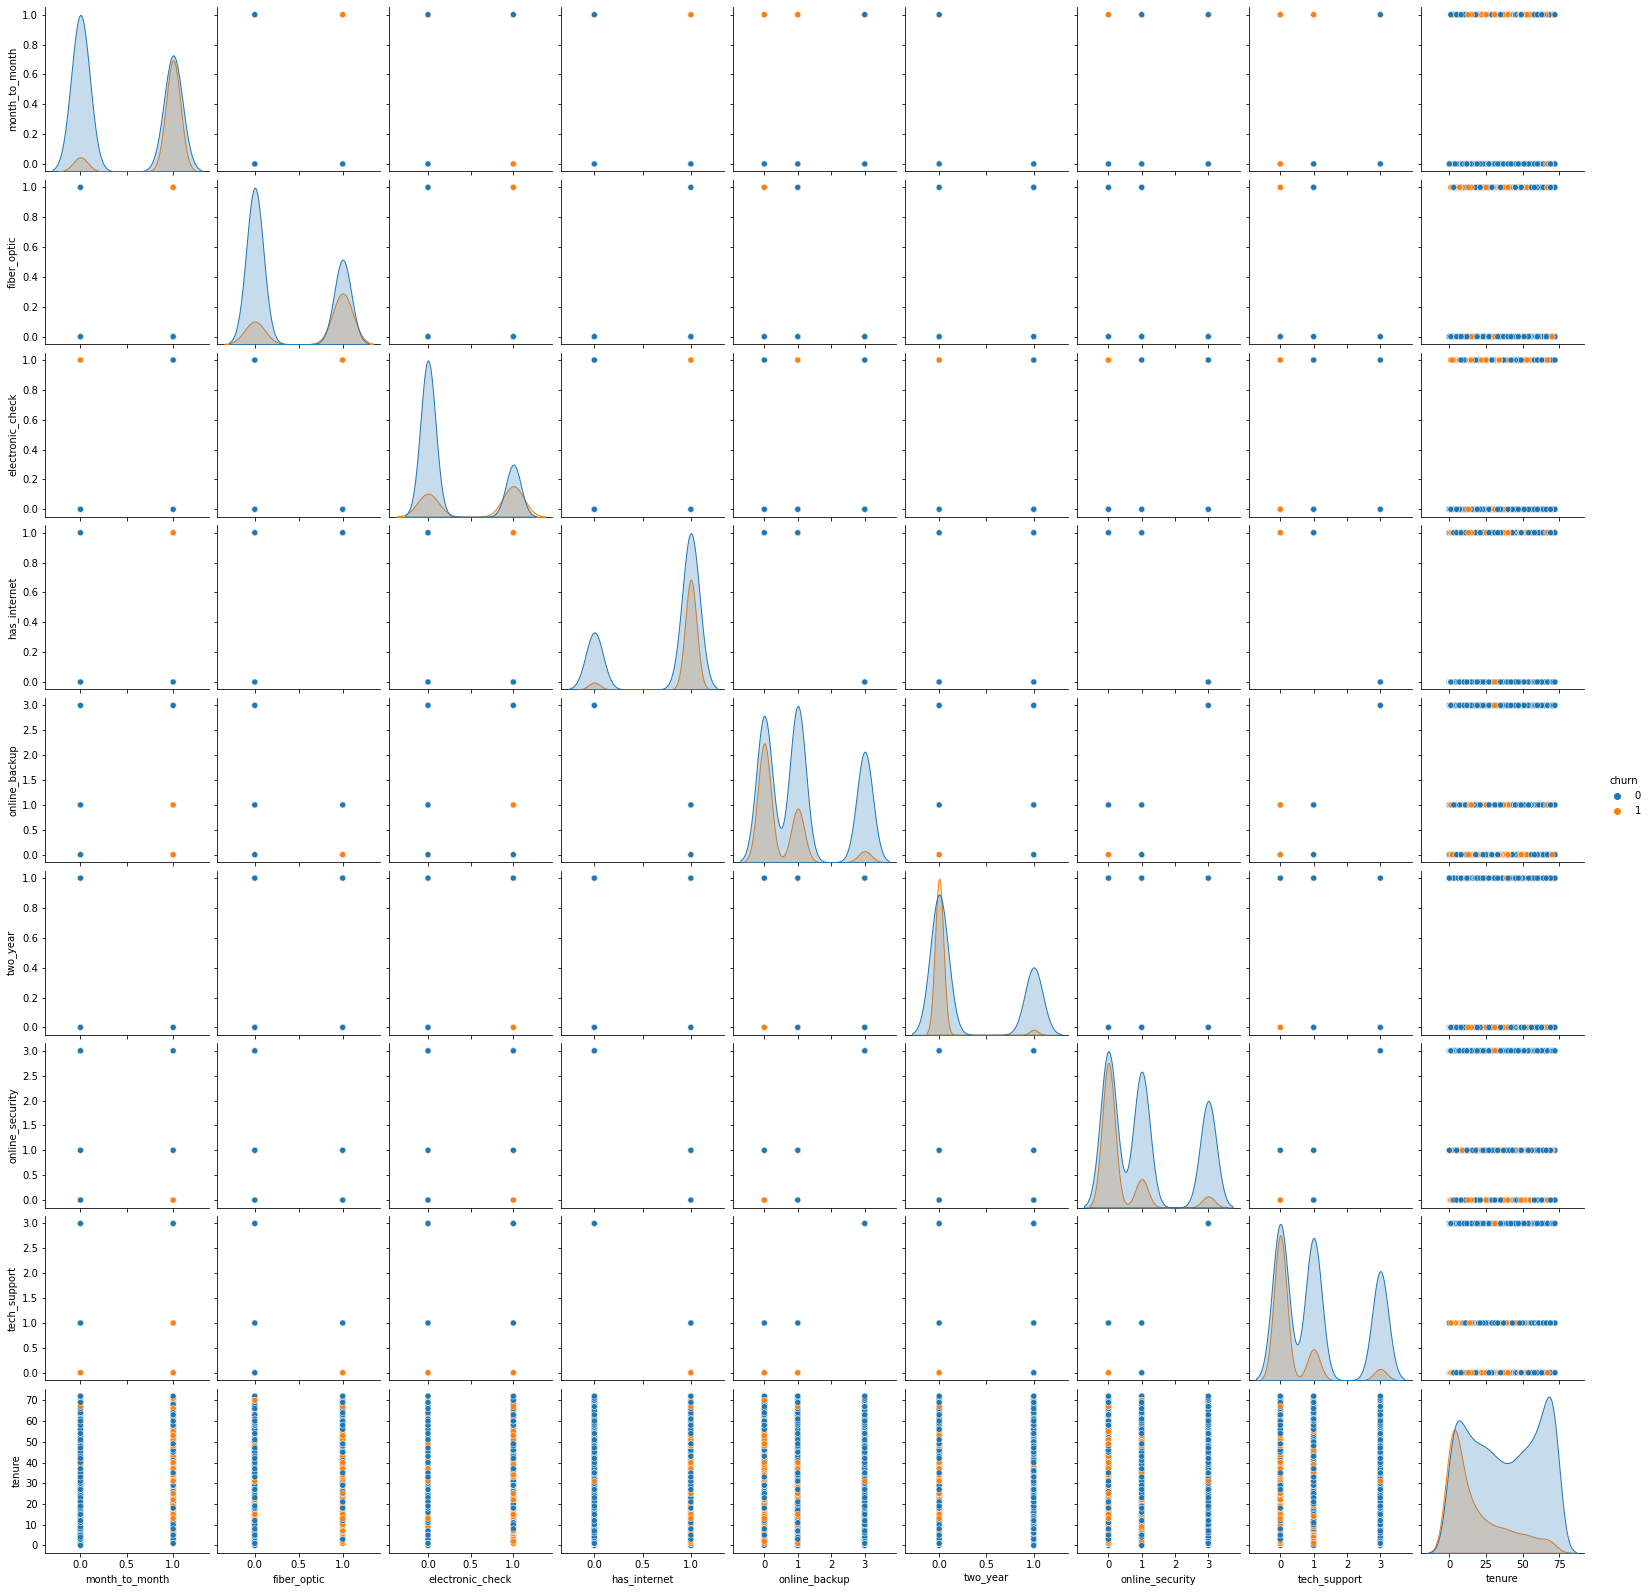

In [148]:
sns.pairplot(train[col_list], hue='churn')
plt.show()
## too much information 

In [ ]:
# i willselect the 3 with positive & negative correlation 

In [165]:
col_list = list(cols[cols > .29].index)  + list(cols[cols < (-.30)].index)
col_list

['churn',
 'month_to_month',
 'fiber_optic',
 'electronic_check',
 'online_security',
 'tech_support',
 'tenure']

In [172]:
exp_train = train[col_list]

In [173]:
exp_train.head()

,churn,month_to_month,fiber_optic,electronic_check,online_security,tech_support,tenure
5642,0,0,0,0,3,3,23
3338,0,0,1,0,0,0,27
4273,0,1,1,1,0,0,7
2382,0,1,0,0,0,0,47
2655,0,0,1,0,0,1,41


In [174]:
# Create melted df for viz
melted = exp_train.melt(id_vars=['churn'])

In [176]:
# Check out melted df info.
melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23658 entries, 0 to 23657
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   churn     23658 non-null  int64 
 1   variable  23658 non-null  object
 2   value     23658 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 554.6+ KB


In [177]:
melted.head()

,churn,variable,value
0,0,month_to_month,0
1,0,month_to_month,0
2,0,month_to_month,1
3,0,month_to_month,1
4,0,month_to_month,0


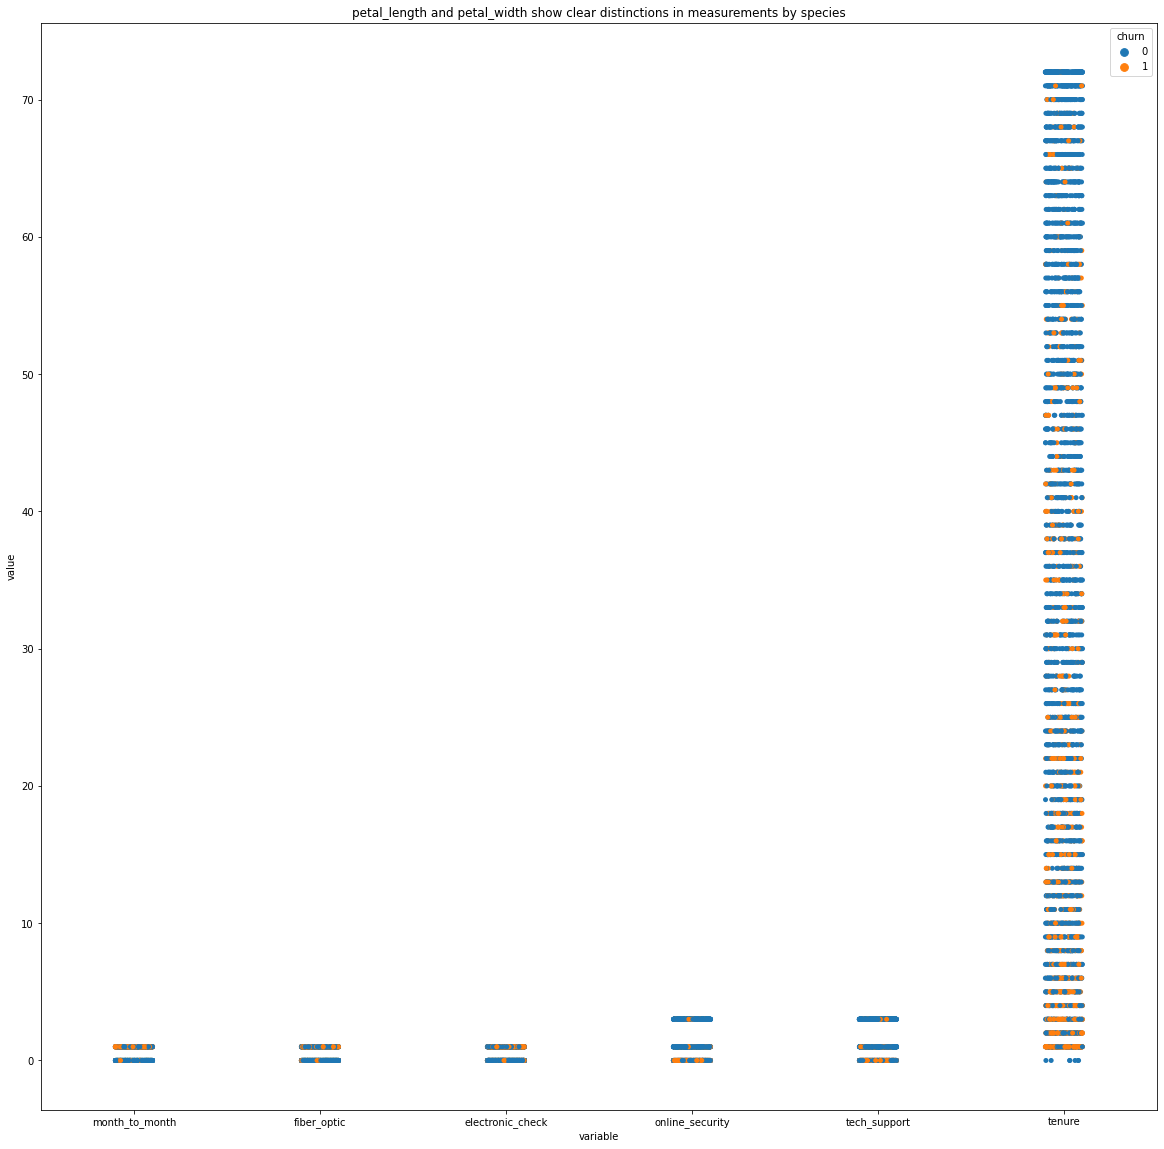

In [180]:
plt.figure(figsize=(20,20))
sns.stripplot(data=melted, x='variable', y='value', hue='churn')

plt.title('petal_length and petal_width show clear distinctions in measurements by species')

plt.show()

In [181]:
exp_train.value_counts()

churn  month_to_month  fiber_optic  electronic_check  online_security  tech_support  tenure
1      1               1            1                 0                0             1         90
0      0               0            0                 1                1             72        52
       1               0            0                 3                3             1         51
       0               1            0                 1                1             72        43
                       0            0                 3                3             72        33
                                                                                               ..
       1               1            0                 1                0             32         1
                                                                                     34         1
                                                                                     36         1
                          